In [1]:
#Standard packages
import pandas as pd
import numpy as np

# Scikit Learn
from sklearn import preprocessing
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer 
from sklearn.model_selection import train_test_split, KFold

#Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize

#Plotting
from matplotlib import pyplot as plt
import seaborn as sns
# Allow plots in Notebook
%matplotlib inline


In [104]:
data = pd.read_csv("D:/Downloads/Roman Urdu DataSet.csv")
data.columns = [['text','sentiment','nan']]
data.head(5)

,text,sentiment,nan
0,sahi bt h,Positive,NaN
1,"Kya bt hai,",Positive,NaN
2,Wah je wah,Positive,NaN
3,Are wha kaya bat hai,Positive,NaN
4,Wah kya baat likhi,Positive,NaN


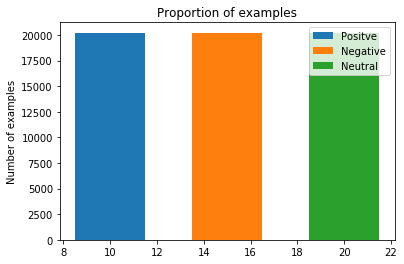

In [105]:
Pos = data[data['sentiment'] == 'Positive'].shape[0]
Neg = data[data['sentiment'] == 'Negative'].shape[0]
Neu = data[data['sentiment'] == 'Neutral'].shape[0]
# bar plot of the 3 classes
plt.bar(10,Pos,3, label="Positve")
plt.bar(15,Neg,3, label="Negative")
plt.bar(20,Neu,3, label="Neutral")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

In [97]:
X = data['text']
#y = data['sentiment']
y = data['sentiment']

In [99]:
X = X.str.lower()
X

AttributeError: 'DataFrame' object has no attribute 'str'

In [74]:
import pandas as pd
import nltk
#X = X.apply(word_tokenize)
X = X.apply(word_tokenize)

TypeError: ('expected string or bytes-like object', 'occurred at index (text,)')

In [58]:
print(X)

0         [Two, private, loans, have, with, them, very, ...
1         [attach, a, letter, dated, explaining, dropped...
2         [Please, see, attached, Complaint, Number, aga...
3         [feel, as, though, 've, been, subjected, to, p...
4         [a, veteran, living, on, social, security, and...
5         [Problem, This, company, has, been, transfered...
6         [have, filed, a, complaint, before, Case, was,...
7         [This, is, about, the, three, major, credit, a...
8         [The, office, of, the, Attorney, general, offi...
9         [To, whom, it, may, concern, am, in, need, of,...
10        [Calls, are, daily, but, they, never, leave, a...
11        [am, a, senior, citizen, with, excellent, cred...
12        [never, opened, an, account, which, was, indic...
13        [need, the, following, addresses, removed, fro...
14        [have, been, trying, since, last, year, to, ob...
15        [Outstanding, bill, for, was, sent, to, collec...
16        [Forced, to, move, from, at, a

In [59]:
from nltk.corpus import stopwords

stopwords_en = stopwords.words('english')
print(stopwords_en)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [60]:
stopwords_en = set(stopwords.words('english')) # Set checking is faster in Python than list.

In [61]:
from string import punctuation
# It's a string so we have to them into a set type
print('From string.punctuation:', type(punctuation), punctuation)

From string.punctuation: <class 'str'> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [62]:
stopwords_en_withpunct = stopwords_en.union(set(punctuation))
print(stopwords_en_withpunct)

{'by', 'doing', "should've", 'ain', 'doesn', 'am', 'down', "isn't", '$', 'who', 'mustn', 'our', 'theirs', 's', 'mightn', 'aren', 'itself', ',', 'didn', 'now', "'", 't', "haven't", 'further', "you'd", 'more', "that'll", 're', 'does', '\\', 'herself', 'with', '-', 'y', 'both', 'are', 'those', 'was', 'i', 'were', 'is', 'its', 'don', 'ours', "don't", "wouldn't", '}', 'at', '(', 'the', 'being', 'too', '!', 'or', 'same', 'through', 'not', '*', 'between', 'm', 'while', 'against', 'what', "hadn't", 'above', 'if', 'o', 'hers', 'had', 'himself', "shan't", '/', '=', 'him', 'most', 'until', "it's", 'that', 'haven', 'should', 'll', '#', '{', '[', '+', 'from', "couldn't", 'for', 'over', 'whom', 'only', '>', 'which', '|', 'he', 'why', 'own', '^', 'a', '@', "you're", "she's", '~', 'once', 'how', "mustn't", 'you', 'ourselves', '_', 'themselves', 'no', 'weren', 'on', 'out', '`', 'off', 'have', 'such', 'because', 'here', 'but', 'about', 'so', "you'll", 'did', "weren't", 'yourself', 'each', 'shan', 'won',

In [63]:
stop = stopwords_en
X = X.apply(lambda x: [item for item in x if item not in stop])
X

0         [Two, private, loans, discharged, Chapter, ban...
1         [attach, letter, dated, explaining, dropped, v...
2         [Please, see, attached, Complaint, Number, cop...
3         [feel, though, 've, subjected, predatory, loan...
4         [veteran, living, social, security, cosigned, ...
5         [Problem, This, company, transfered, debt, una...
6         [filed, complaint, Case, hit, double, whammy, ...
7         [This, three, major, credit, agencies, errors,...
8         [The, office, Attorney, general, office, repor...
9         [To, may, concern, need, help, private, loan, ...
10        [Calls, daily, never, leave, message, respond,...
11        [senior, citizen, excellent, credit, WF, mortg...
12              [never, opened, account, indicated, report]
13        [need, following, addresses, removed, credit, ...
14        [trying, since, last, year, obtain, credit, re...
15        [Outstanding, bill, sent, collection, agency, ...
16        [Forced, move, apartments, due

In [64]:
stop = stopwords_en_withpunct
X = X.apply(lambda x: [item for item in x if item not in stop])
X

0         [Two, private, loans, discharged, Chapter, ban...
1         [attach, letter, dated, explaining, dropped, v...
2         [Please, see, attached, Complaint, Number, cop...
3         [feel, though, 've, subjected, predatory, loan...
4         [veteran, living, social, security, cosigned, ...
5         [Problem, This, company, transfered, debt, una...
6         [filed, complaint, Case, hit, double, whammy, ...
7         [This, three, major, credit, agencies, errors,...
8         [The, office, Attorney, general, office, repor...
9         [To, may, concern, need, help, private, loan, ...
10        [Calls, daily, never, leave, message, respond,...
11        [senior, citizen, excellent, credit, WF, mortg...
12              [never, opened, account, indicated, report]
13        [need, following, addresses, removed, credit, ...
14        [trying, since, last, year, obtain, credit, re...
15        [Outstanding, bill, sent, collection, agency, ...
16        [Forced, move, apartments, due

In [65]:
from nltk.stem.snowball import SnowballStemmer
# Use English stemmer.
stemmer = SnowballStemmer("english")
X = X.apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
#df = df.drop(columns=['unstemmed']) # Get rid of the unstemmed column.
#df # Print dataframe.

In [66]:
X

0         [two, privat, loan, discharg, chapter, bankrup...
1         [attach, letter, date, explain, drop, vehicl, ...
2         [pleas, see, attach, complaint, number, copi, ...
3         [feel, though, ve, subject, predatori, loan, r...
4         [veteran, live, social, secur, cosign, loan, d...
5         [problem, this, compani, transfer, debt, unabl...
6         [file, complaint, case, hit, doubl, whammi, ye...
7         [this, three, major, credit, agenc, error, get...
8         [the, offic, attorney, general, offic, report,...
9         [to, may, concern, need, help, privat, loan, a...
10        [call, daili, never, leav, messag, respond, ca...
11        [senior, citizen, excel, credit, wf, mortgag, ...
12                    [never, open, account, indic, report]
13        [need, follow, address, remov, credit, file, s...
14        [tri, sinc, last, year, obtain, credit, report...
15        [outstand, bill, sent, collect, agenc, paid, f...
16        [forc, move, apart, due, found

In [67]:
X_df = pd.DataFrame(X)
X_df

,text
0,"[two, privat, loan, discharg, chapter, bankrup..."
1,"[attach, letter, date, explain, drop, vehicl, ..."
2,"[pleas, see, attach, complaint, number, copi, ..."
3,"[feel, though, ve, subject, predatori, loan, r..."
4,"[veteran, live, social, secur, cosign, loan, d..."
5,"[problem, this, compani, transfer, debt, unabl..."
6,"[file, complaint, case, hit, doubl, whammi, ye..."
7,"[this, three, major, credit, agenc, error, get..."
8,"[the, offic, attorney, general, offic, report,..."
9,"[to, may, concern, need, help, privat, loan, a..."


In [68]:
X_df.head(5)

,text
0,"[two, privat, loan, discharg, chapter, bankrup..."
1,"[attach, letter, date, explain, drop, vehicl, ..."
2,"[pleas, see, attach, complaint, number, copi, ..."
3,"[feel, though, ve, subject, predatori, loan, r..."
4,"[veteran, live, social, secur, cosign, loan, d..."


In [69]:
X,y

(0         [two, privat, loan, discharg, chapter, bankrup...
 1         [attach, letter, date, explain, drop, vehicl, ...
 2         [pleas, see, attach, complaint, number, copi, ...
 3         [feel, though, ve, subject, predatori, loan, r...
 4         [veteran, live, social, secur, cosign, loan, d...
 5         [problem, this, compani, transfer, debt, unabl...
 6         [file, complaint, case, hit, doubl, whammi, ye...
 7         [this, three, major, credit, agenc, error, get...
 8         [the, offic, attorney, general, offic, report,...
 9         [to, may, concern, need, help, privat, loan, a...
 10        [call, daili, never, leav, messag, respond, ca...
 11        [senior, citizen, excel, credit, wf, mortgag, ...
 12                    [never, open, account, indic, report]
 13        [need, follow, address, remov, credit, file, s...
 14        [tri, sinc, last, year, obtain, credit, report...
 15        [outstand, bill, sent, collect, agenc, paid, f...
 16        [forc, move, 